In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
import time

from mlbt.tearsheets import create_frontend_payload, make_default_config
from mlbt.multiprocess import process_jobs

config = make_default_config()

def latest_files(files):
    return list(sorted(files, key=os.path.getmtime)[::-1])

all_files = (config["DATA_DIR"] / 'payloads').files()

files = [x for x in all_files if x.size / 1e6 > 10 and '_none_' in x]
files = [x for x in all_files if x.size / 1e6 > 1]# and '_none_' in x]

# latest_file(files)

In [16]:
# time.sleep(60 * 20)
files = latest_files(files)[:16]
print(files)

[Path('C:\\Users\\doda/Dropbox/algotrading/data\\payloads\\payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_25_none_[]_random_forest.json'), Path('C:\\Users\\doda/Dropbox/algotrading/data\\payloads\\payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_50_none_[]_random_forest.json'), Path('C:\\Users\\doda/Dropbox/algotrading/data\\payloads\\payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_6_none_[]_random_forest.json'), Path('C:\\Users\\doda/Dropbox/algotrading/data\\payloads\\payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_12_none_[]_random_forest.json'), Path('C:\\Users\\doda/Dropbox/algotrading/data\\payloads\\payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_50_none_[]_xgboost.json'), Path('C:\\Users\\doda/Dropbox/algotrading/data\\payloads\\payload_agriculture-currency-energy-eq

In [17]:
datas = [{'func': create_frontend_payload, 'file_name': fn, 'force': True} for fn in files]
process_jobs(datas, num_threads=min(len(datas), 20))
datas

2020-02-21 01:11:19.587356 100.0% create_frontend_payload done after 1.05 minutes. Remaining 0.0 minutes..


[{'func': <function mlbt.tearsheets.create_frontend_payload(file_name, force=False, our_config=None)>,
  'file_name': Path('C:\\Users\\doda/Dropbox/algotrading/data\\payloads\\payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_25_none_[]_random_forest.json'),
  'force': True},
 {'func': <function mlbt.tearsheets.create_frontend_payload(file_name, force=False, our_config=None)>,
  'file_name': Path('C:\\Users\\doda/Dropbox/algotrading/data\\payloads\\payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_50_none_[]_random_forest.json'),
  'force': True},
 {'func': <function mlbt.tearsheets.create_frontend_payload(file_name, force=False, our_config=None)>,
  'file_name': Path('C:\\Users\\doda/Dropbox/algotrading/data\\payloads\\payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_6_none_[]_random_forest.json'),
  'force': True},
 {'func': <function mlbt.tearsheets.create_fron

2020-02-21 00:37:04,118 Generating signals for 47 symbols on 446724 events with b_params=12
2020-02-21 00:37:04,168 Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2020-02-21 00:37:04,169 NumExpr defaulting to 8 threads.
2020-02-21 00:37:06,108 Creating primary tearsheet for C:\Users\doda/pr/fincl/frontend/public/payloads\f_payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_12_bbands-mr_[500, 1.75]_lgbm.json


Start date,2015-05-13
End date,2020-01-16
Total months,58
,Backtest
Annual return,4.7%
Cumulative returns,24.9%
Annual volatility,12.9%
Sharpe ratio,0.42
Calmar ratio,0.22
Stability,0.60
Max drawdown,-21.0%


c:\users\doda\anaconda3\envs\fincl\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,20.96,2015-06-10,2016-01-20,2016-06-30,277
1,20.00,2018-05-30,2019-08-23,NaT,NaN
2,7.80,2018-01-26,2018-02-09,2018-04-18,59
3,6.04,2017-11-29,2017-12-12,2018-01-17,36
4,4.81,2016-07-14,2016-08-02,2016-08-18,26


c:\users\doda\anaconda3\envs\fincl\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)
2020-02-21 00:37:24,029 Creating secondary tearsheet for C:\Users\doda/pr/fincl/frontend/public/payloads\f_payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_12_bbands-mr_[500, 1.75]_lgbm.json


Start date,2015-05-13
End date,2020-01-16
Total months,58
,Backtest
Annual return,4.2%
Cumulative returns,21.9%
Annual volatility,14.4%
Sharpe ratio,0.36
Calmar ratio,0.17
Stability,0.59
Max drawdown,-25.1%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,25.14,2015-05-14,2016-01-20,2016-09-22,356
1,22.31,2018-05-23,2019-08-23,NaT,NaN
2,9.46,2018-01-26,2018-02-09,2018-05-10,75
3,7.32,2017-02-10,2017-06-22,2017-07-18,113
4,6.93,2017-11-29,2017-12-12,2018-01-12,33


c:\users\doda\anaconda3\envs\fincl\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)
2020-02-21 00:37:35,453 Writing f_payload at C:\Users\doda/pr/fincl/frontend/public/payloads\f_payload_agriculture-currency-energy-equity_index-interest_rate-metals_dollar_fixed_horizon_12_bbands-mr_[500, 1.75]_lgbm.json


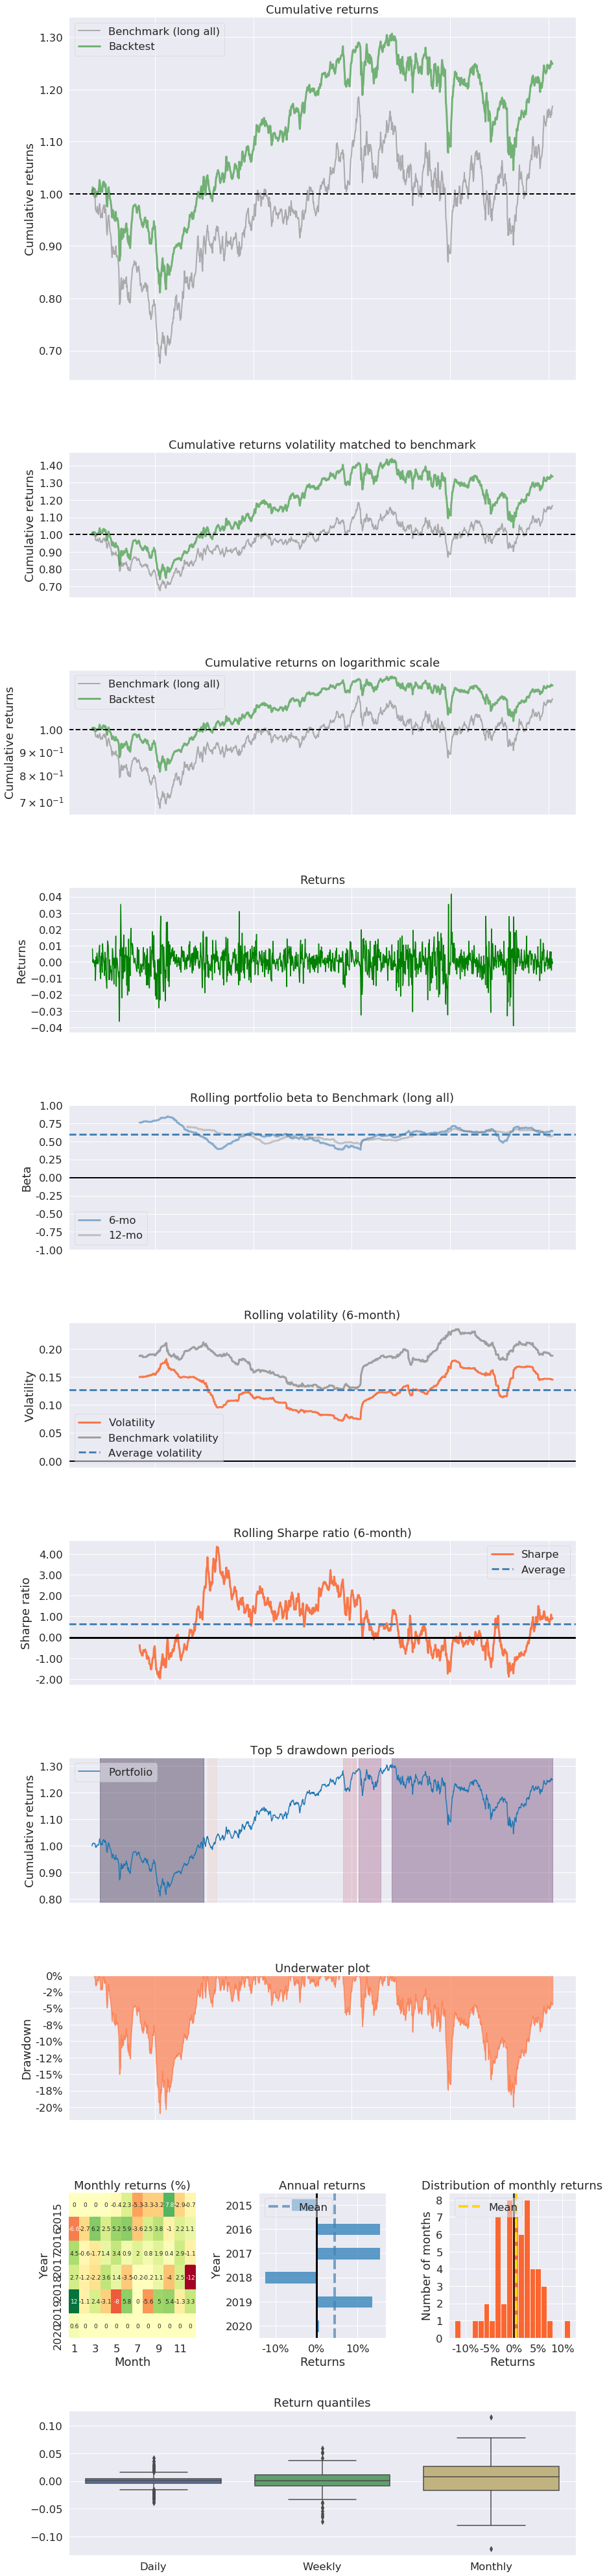

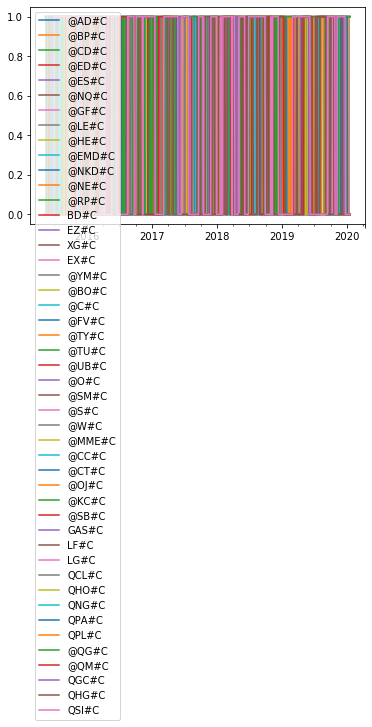

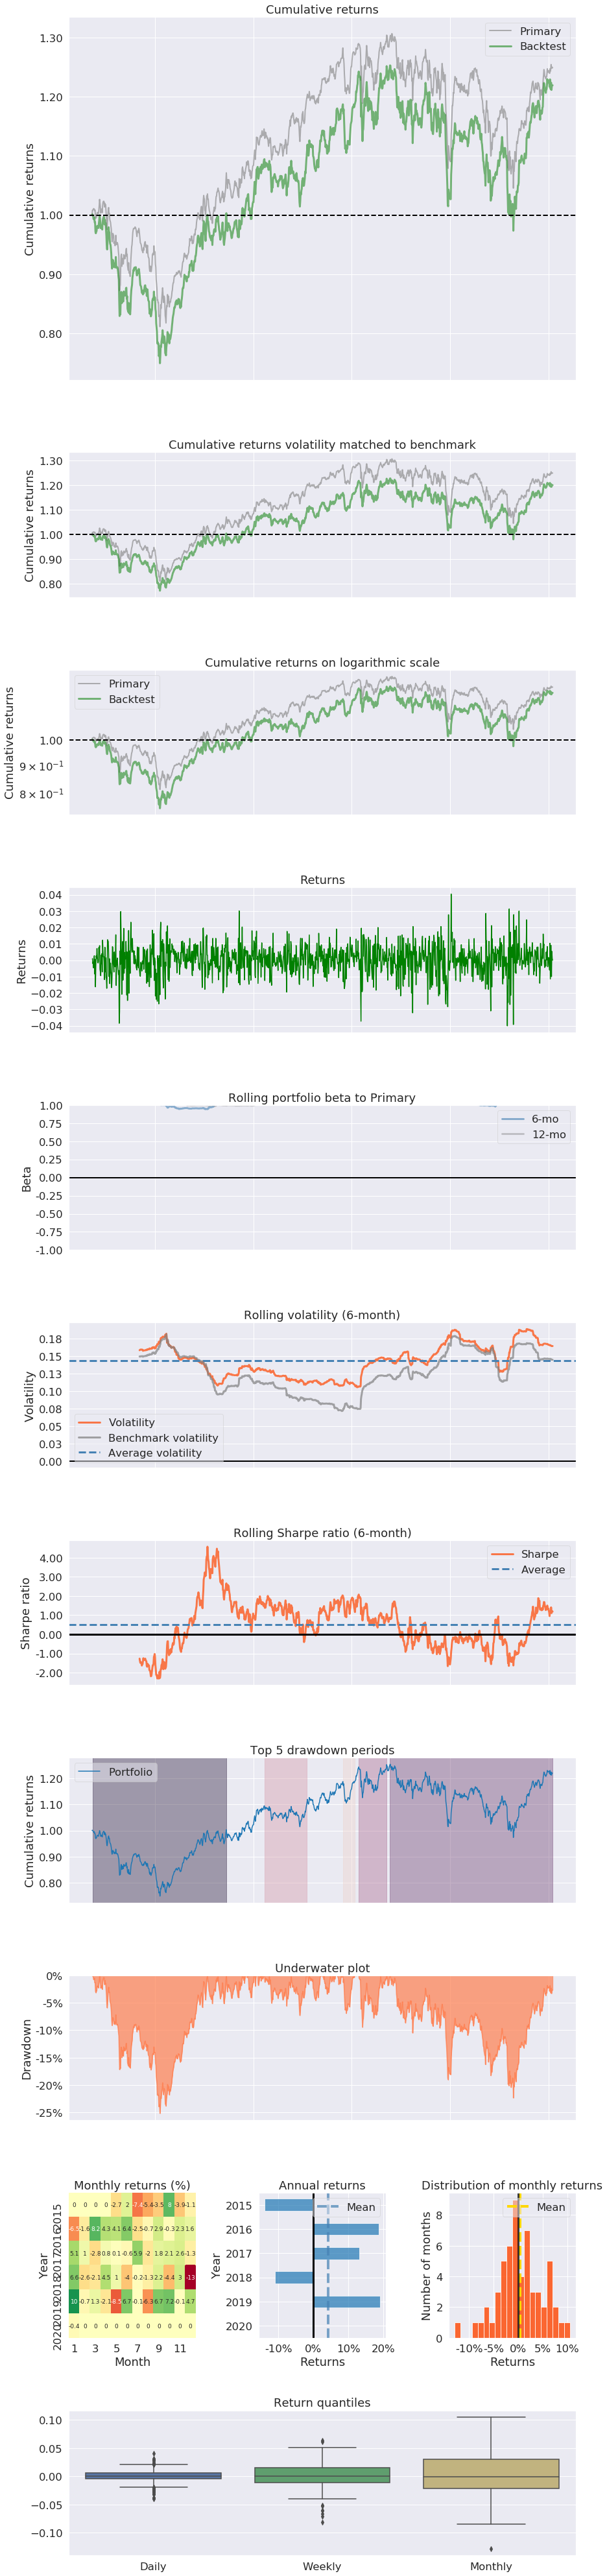

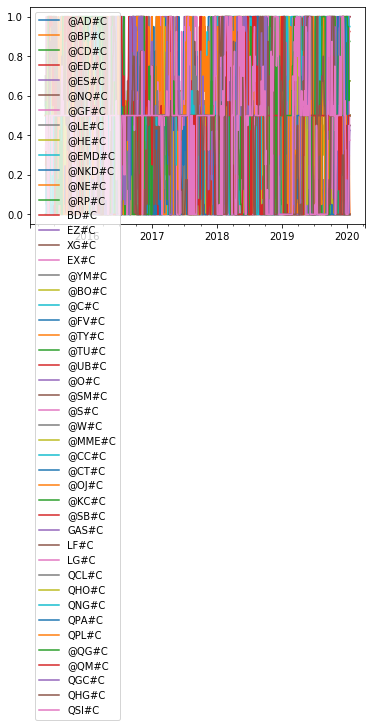

In [10]:
for file in files:
    create_frontend_payload(file, True)

In [13]:
%debug

> c:\users\doda\pr\fincl\backend\mlbt\historical_bt.py(33)estimate_trading_costs()
     31     multipliers = prices.copy()
     32     for col in multipliers.columns:
---> 33         multipliers[col] = config["symbols_map"].loc[col, "multiplier"]
     34 
     35     tick_sizes = prices.copy()

ipdb> config
{'DATA_DIR': 'C:\\Users\\doda/Dropbox/algotrading/data', 'F_PAYLOAD_DIR': 'C:\\Users\\doda/pr/fincl/frontend/public/payloads', 'start_date': '2000-01-01', 'end_date': '2021-01-01', 'vol_estimate': 100, 'downsampling': 'cusum', 'symbols': ['@NQ#C'], 'symbol_groups': None, 'features': [{'name': 'ewm_mean', 'window': 5, 'symbol': {'name': 'sadf', 'symbol': {'name': 'make_bars', 'type_': 'time', 'size': 1, 'resolution': 'D', 'symbol': '@ES#C'}}}, {'name': 'lag', 'lag': 5, 'symbol': {'name': 'ewm_mean', 'window': 5, 'symbol': {'name': 'sadf', 'symbol': {'name': 'make_bars', 'type_': 'time', 'size': 1, 'resolution': 'D', 'symbol': '@ES#C'}}}}, {'name': 'lag', 'lag': 50, 'symbol': {'name':